In [282]:
# Importing libraries and dataset
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()

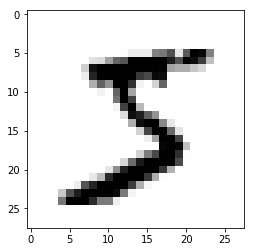

In [283]:
# Example dataset
plt.imshow(xTrain[0], cmap='binary')

In [284]:
# Normalize the data to 0-1
xTrain = xTrain / 255.0;
xTest = xTest / 255.0;

# Reshape the inputs to be a column vector
xTrain = xTrain.reshape(-1, 784)
xTest = xTest.reshape(-1, 784)

# One-hot encoding for the targets
yTrainOneHot = np.zeros((60000, 10))
yTrainOneHot[np.arange(60000), yTrain] = 1

yTestOneHot = np.zeros((len(yTest), 10))
yTestOneHot[np.arange(len(yTest)), yTest] = 1

In [285]:
# Initialize tweaking variables
learningRate = 0.005;
epochs = 30;
batch_size = 100;

# Placeholder for running batch optimization
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

In [286]:
# Setting initial bias and weights
W1 = tf.Variable(tf.random_normal([784, 300], stddev=0.1), name="W1")
B1 = tf.Variable(tf.random_normal([300]), name="B1")

W2 = tf.Variable(tf.random_normal([300, 10], stddev=0.1), name="W2")
B2 = tf.Variable(tf.random_normal([10]), name="B2")

In [287]:
# Defining operation between layers
hidden_out = tf.add(tf.matmul(x, W1), B1)
hidden_out = tf.nn.relu(hidden_out)

In [288]:
# Define the last activation function to produce output
outputY = tf.nn.softmax(tf.add(tf.matmul(hidden_out, W2), B2))

In [289]:
# Calculating loss; adding 1e-10 prevents taking logarithm of 0
cross_entropy = -tf.reduce_sum(y*tf.log(outputY + 1e-10))

In [290]:
# Defining the optimizer to minimize cross_entropy loss
optimiser = tf.train.GradientDescentOptimizer(learning_rate=learningRate).minimize(cross_entropy)

In [291]:
init_op = tf.global_variables_initializer()

# Calculate accuracy by taking the mean of correct predictions
correctPrediction = tf.equal(tf.argmax(y, 1), tf.argmax(outputY, 1))
accuracy = tf.reduce_mean(tf.cast(correctPrediction, tf.float32))

In [374]:
# Run the training
costArray = [0] * epochs

with tf.Session() as sess:
    sess.run(init_op)
    totalBatch = int(len(xTrain) / batch_size)
    for epoch in range (epochs):
        avgCost = 0
        for i in range(totalBatch):
            batchX, batchY = xTrain[i*batch_size : (i+1)*batch_size], yTrainOneHot[i*batch_size : (i+1)*batch_size]
            _, cost = sess.run([optimiser, cross_entropy], feed_dict={x: batchX, y: batchY})
            avgCost += cost/totalBatch
        print("Epoch:", (epoch+1), "cost =", "{:.3f}".format(avgCost))
        costArray[epoch] = avgCost
    print("Accuracy:", "{:.3f} %".format(sess.run(accuracy, feed_dict={x:xTest, y:yTestOneHot}) * 100))

Epoch: 1 cost = 42.449
Epoch: 2 cost = 11.749
Epoch: 3 cost = 8.138
Epoch: 4 cost = 6.154
Epoch: 5 cost = 4.744
Epoch: 6 cost = 3.727
Epoch: 7 cost = 2.934
Epoch: 8 cost = 2.336
Epoch: 9 cost = 1.848
Epoch: 10 cost = 1.466
Epoch: 11 cost = 1.172
Epoch: 12 cost = 0.951
Epoch: 13 cost = 0.784
Epoch: 14 cost = 0.656
Epoch: 15 cost = 0.554
Epoch: 16 cost = 0.475
Epoch: 17 cost = 0.413
Epoch: 18 cost = 0.364
Epoch: 19 cost = 0.325
Epoch: 20 cost = 0.290
Epoch: 21 cost = 0.263
Epoch: 22 cost = 0.239
Epoch: 23 cost = 0.219
Epoch: 24 cost = 0.202
Epoch: 25 cost = 0.187
Epoch: 26 cost = 0.174
Epoch: 27 cost = 0.163
Epoch: 28 cost = 0.153
Epoch: 29 cost = 0.144
Epoch: 30 cost = 0.136
Accuracy: 98.020 %


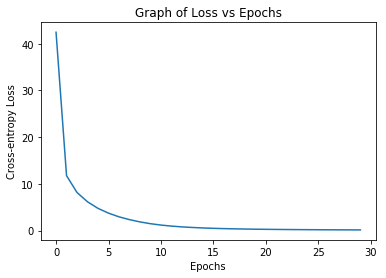

In [387]:
fig, ax = plt.subplots()

ax.plot(np.arange(epochs), costArray)
ax.set_title("Graph of Loss vs Epochs")
ax.set_ylabel("Cross-entropy Loss")
ax.set_xlabel("Epochs")
plt.show()